In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dylanjcastillo/7k-books-with-metadata")

print("Path to dataset files:", path)

100%|█████████████████████████████████████████████████████████████████████████████| 1.47M/1.47M [00:01<00:00, 1.37MB/s]

Extracting files...
Path to dataset files: C:\Users\prisc\.cache\kagglehub\datasets\dylanjcastillo\7k-books-with-metadata\versions\3


In [2]:
import pandas as pd

In [5]:
path

'C:\\Users\\prisc\\.cache\\kagglehub\\datasets\\dylanjcastillo\\7k-books-with-metadata\\versions\\3'

In [6]:
books = pd.read_csv(f"{path}/books.csv")

In [8]:
books.head()

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0


In [ ]:
# isbn10 are all distinct. so we don't have to do any cleaning
# Hundreds of categories: need to be simplifies as we are building a recommender and don't want to have hundreds to choose from
# A lot of subtitles are missing (4429, seen from books.isnull().sum()) so this column may be useless

In [17]:
books.describe(include='all')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
count,6.810000e+03,6810,6810,2381,6738,6711,6481,6548,6804.000000,6767.000000,6767.000000,6.767000e+03
unique,NaN,6810,6398,2009,3780,567,6481,6474,NaN,NaN,NaN,NaN
top,NaN,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,This is a reproduction of the original artefac...,NaN,NaN,NaN,NaN
freq,NaN,1,11,226,37,2588,1,6,NaN,NaN,NaN,NaN
mean,9.780677e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.630364,3.933284,348.181026,2.106910e+04
std,6.068911e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.484257,0.331352,242.376783,1.376207e+05
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1853.000000,0.000000,0.000000,0.000000e+00
25%,9.780330e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996.000000,3.770000,208.000000,1.590000e+02
50%,9.780553e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.960000,304.000000,1.018000e+03
75%,9.780810e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,420.000000,5.992500e+03


In [18]:
books.isnull().sum()

isbn13               0
isbn10               0
title                0
subtitle          4429
authors             72
categories          99
thumbnail          329
description        262
published_year       6
average_rating      43
num_pages           43
ratings_count       43
dtype: int64

In [16]:
books.shape

(6810, 12)

In [37]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6810 entries, 0 to 6809
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbn13               6810 non-null   int64  
 1   isbn10               6810 non-null   object 
 2   title                6810 non-null   object 
 3   subtitle             2381 non-null   object 
 4   authors              6738 non-null   object 
 5   categories           6711 non-null   object 
 6   thumbnail            6481 non-null   object 
 7   description          6548 non-null   object 
 8   published_year       6804 non-null   float64
 9   average_rating       6767 non-null   float64
 10  num_pages            6767 non-null   float64
 11  ratings_count        6767 non-null   float64
 12  missing_description  6810 non-null   int32  
 13  age                  6804 non-null   float64
 14  age_of_book          6804 non-null   float64
dtypes: float64(6), int32(1), int64(1), obj

In [20]:
!pip install seaborn

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
'''
Observation from the plot below:
- a lot of subtitle are missing
- missing values for the middle columns are mostly looking random
- there is a pattern for the missing values for the bottom (avg rating, num pages & rating count), that one of them is missing, have all of them are missing. probably the dataset comes from another dataset.
may potentially be a source of bias, missing maybe they are newer, or better rated, worse rated
'''

'\nObservation from the plot below:\n- a lot of subtitle are missing\n- missing values for the middle columns are mostly looking random\n- there is a pattern for the missing values for the bottom (avg rating, num pages & rating count), that one of them is missing, have all of them are missing. probably the dataset comes from another dataset.\nmay potentially be a source of bias, missing maybe they are newer, or better rated, worse rated\n'

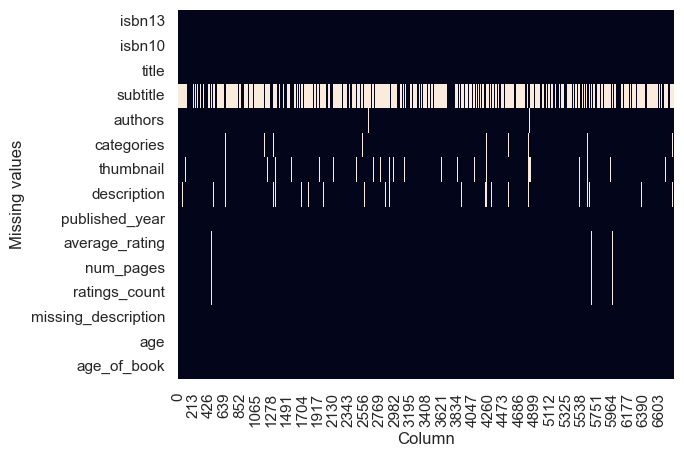

In [39]:
ax = plt.axes()
sns.heatmap(books.isna().transpose(), cbar=False, ax=ax)

plt.xlabel("Column")
plt.ylabel("Missing values")
plt.show()

In [ ]:
# Is the books with missing description values more likely to be older or shorter? In order not to have our recommender to be bias against age/num page/rating

In [33]:
import numpy as np

books['missing_description'] = np.where(books['description'].isna(), 1, 0) # Book with missing description has 1 value
books['age_of_book'] = 2025 - books['published_year']


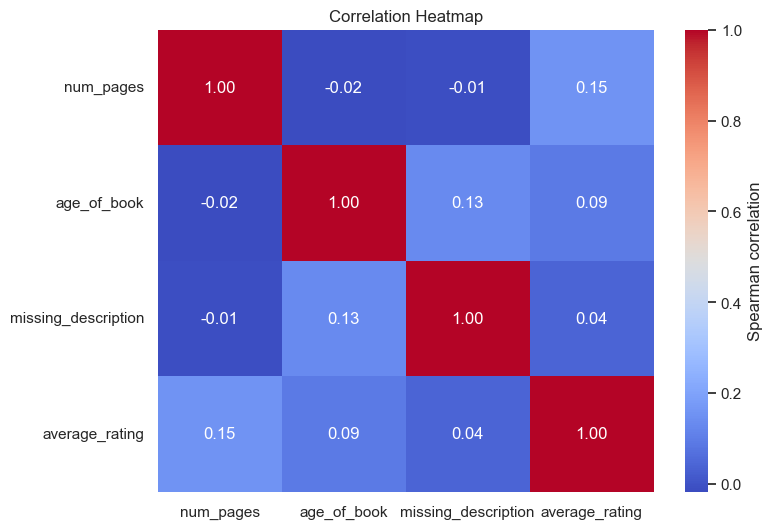

In [36]:
columns_of_interest = ['num_pages', 'age_of_book', 'missing_description', 'average_rating']

correlation_matrix = books[columns_of_interest].corr(method = "spearman") # pearson: for continuous vars, spearman: non-cont values like missing_descrption

sns.set_theme(style='white')
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Spearman correlation"})
heatmap.set_title("Correlation Heatmap")
plt.show()



In [ ]:
'''
We'll remove rows with missing description because:
1. Relatively a small number of missing description (262/6810 = 3.8%)
2. Doesn't seem to be a pattern on the missingness (as seen in the correlation heatmap above)
3. Too much work retrieving the description, a lot of web scraping
'''

In [38]:
262/6810


0.03847283406754772

In [42]:
# IF it is missing in description OR num_ages etc. 303/6810 = 4.4%, under 5%)
books[(books['description'].isna()) |
    (books['num_pages'].isna()) |
    (books['average_rating'].isna()) |
    (books['published_year'].isna())
]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0,32.0


In [44]:
books_missing = books[~(books['description'].isna()) &
    ~(books['num_pages'].isna()) &
    ~(books['average_rating'].isna()) &
    ~(books['published_year'].isna())
]

In [80]:
books_missing.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0,0,21.0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0,0,25.0,25.0,205
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0,0,43.0,43.0,14
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0,0,32.0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0,0,23.0,23.0,45
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0,0,23.0,23.0,75
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0,0,48.0,48.0,1
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0,0,27.0,27.0,80
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0,0,31.0,31.0,160
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0,0,43.0,43.0,30


In [48]:
books_missing.shape

(6507, 15)

In [50]:
books_missing.describe(include='all')

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,age_of_book
count,6.507000e+03,6507,6507,2281,6444,6474,6293,6507,6507.000000,6507.000000,6507.000000,6.507000e+03,6507.0,6507.000000,6507.000000
unique,NaN,6507,6133,1915,3629,531,6293,6434,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,0002005883,The Lord of the Rings,A Novel,Agatha Christie,Fiction,http://books.google.com/books/content?id=KQZCP...,No Marketing Blurb,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,10,225,37,2523,1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.780668e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1998.966498,3.932683,346.071000,2.175727e+04,0.0,26.033502,26.033502
std,5.868404e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.837214,0.322427,233.440498,1.402505e+05,0.0,9.837214,9.837214
min,9.780002e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1876.000000,0.000000,0.000000,0.000000e+00,0.0,6.000000,6.000000
25%,9.780317e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1997.000000,3.770000,208.000000,1.750000e+02,0.0,20.000000,20.000000
50%,9.780552e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2002.000000,3.950000,304.000000,1.081000e+03,0.0,23.000000,23.000000
75%,9.780807e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.000000,4.130000,418.000000,6.309500e+03,0.0,28.000000,28.000000


In [51]:
books_missing.isnull().sum()

isbn13                    0
isbn10                    0
title                     0
subtitle               4226
authors                  63
categories               33
thumbnail               214
description               0
published_year            0
average_rating            0
num_pages                 0
ratings_count             0
missing_description       0
age                       0
age_of_book               0
dtype: int64

In [70]:
# Categories most popular at the top. Note: without sort_values the result is the same

category_counts = books_missing['categories'].value_counts().reset_index().sort_values("count", ascending=False)
category_counts

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


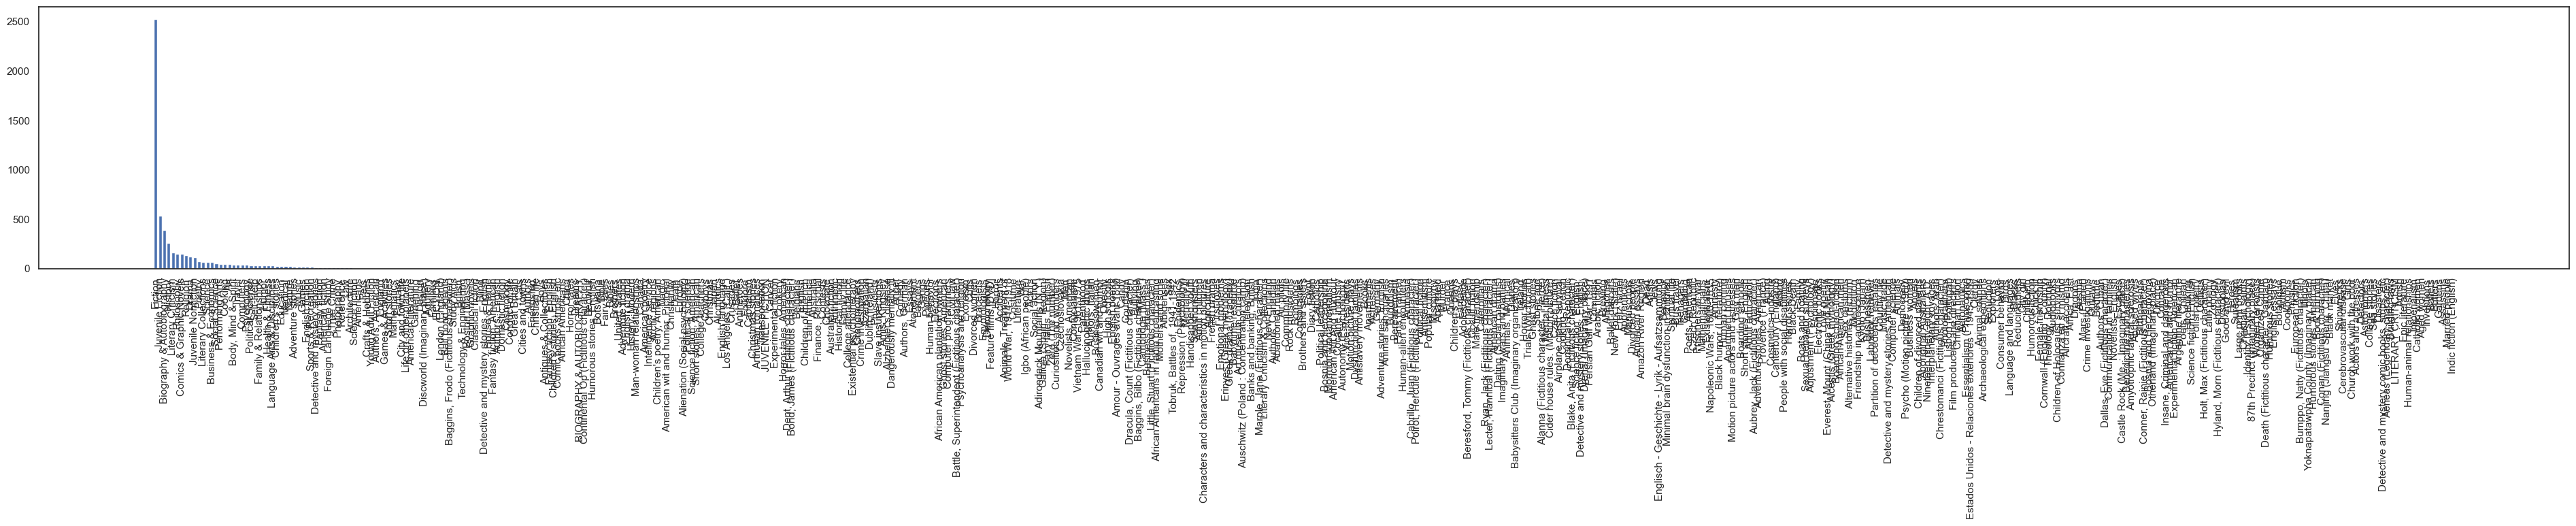

In [77]:
# Long tail problem of description feature, how we are going to normalize that using LLM, text classification, to potentially refine it a bit more
# Description needs to be meaningful for the recommendation to work
plt.figure(figsize=(48,5))
plt.bar(category_counts['categories'], category_counts['count'])
plt.xticks(rotation=90)

plt.show()

In [79]:
# Check how long the description is, if it's 1 word (like row#7 Donation.) then most likely not going to be useful
books_missing['words_in_description'] = books_missing['description'].str.split().str.len()

C:\Users\prisc\AppData\Local\Temp\ipykernel_23520\3882451725.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_missing['words_in_description'] = books_missing['description'].str.split().str.len()


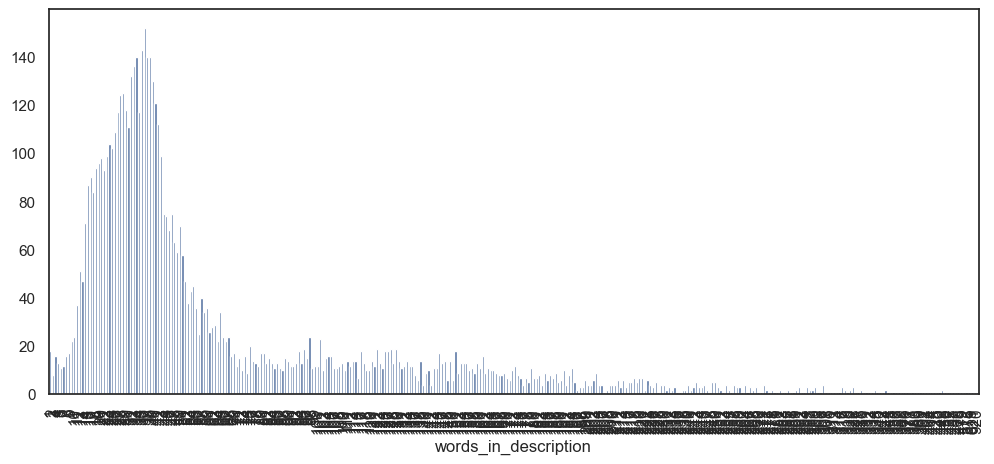

In [90]:
words_count = books_missing['words_in_description'].value_counts()

plt.figure(figsize=(12,5))
sns.barplot(x=words_count.index, y=words_count.values)
plt.xticks(rotation=90)
plt.show()

In [91]:
# Create arbritary cutout point for a description to be meaningful
# Examine descriptions with 1 to 4 words as 1st bin: yes these are useless descriptions

books_missing.loc[books_missing['words_in_description'].between(1,4), 'description']

6                                           Donation.
11                                     Fantasy-roman.
748              Includes bibliographical references.
770                             Bound For Oregon (PB)
775                                No Marketing Blurb
812                                No Marketing Blurb
857                          First published in 1813.
944                         Edited by Maurice Hindle.
953                        DEFOE/ROBINSON CRUSOE (BC)
954                             Edited by John Carey.
962                         ALLEN/GETTING THINGS DONE
1054                            GILBERT/EAT PRAY LOVE
1056    "Graham Greene centennial, 1904-2004"--Cover.
1060                   STEINBECK/GRAPES OF WRATH (BC)
1346                                   Fantasy-roman.
1546                                      Winter 2003
1610                                      Winter 1999
1813                             National bestseller.
1981                        

In [93]:
# Examine the next bin: between 5 to 14: still useless description
books_missing.loc[books_missing['words_in_description'].between(5,14), 'description']

2       Volume Two of Stephen Donaldson's acclaimed se...
38      Koko is Peter Straub's foray into the psycholo...
70      A matter of life and death - and the Throne of...
77                         Nonsense rhyming story. 4 yrs+
84      A study guide for the novel There's a Boy in t...
                              ...                        
6715    The first comprehensive guide to addressing Na...
6726       Presents two complete novels from Henry James.
6757                          Audio Book- unabriged on CD
6776    Raymond Chandler meets The Exorcist. Classic n...
6795    Book Of Five Rings is a Kodansha International...
Name: description, Length: 308, dtype: object

In [95]:
# Examine the next bin: between 15 to 24: may still be not enough
pd.set_option('display.max_colwidth', None) 

books_missing.loc[books_missing['words_in_description'].between(15,24), 'description']

10                                                          One of Sidney Sheldon's most popular and bestselling titles, repackaged and reissued for a new generation of fans.
32                                                                                Tells the story of three generations of Chinese women, beginning at the turn of the century.
36                                 A magical and fantastic collection of early stories by one of the most original children's authors of the 20th century. For 8-11 year olds.
57                                                          A young drifter finds more than he bargained for when he agrees to deliver a parcel to an English country house...
68                                        A new 'The Doors of Perception' for the 21st century? A visionary journey from cynicism to shamanism by a brilliant young US writer.
                                                                                         ...                                 

In [96]:
# Final bin: we'll use 25 words as a cut off

books_missing.loc[books_missing['words_in_description'].between(25,34), 'description']

9                                                     Kate Blackwell is an enigma and one of the most powerful women in the world. But at her ninetieth birthday celebrations there are ghosts of absent friends and absent enemies.
14                                               Available in the U.S. for the first time, this is the second volume in the exceptional Legends of the Riftwar series from "New York Times"-bestselling authors Feist and Rosenberg.
20                             It is 1937, and Charles Ashworth, a Canon to the Archbishop of Canterbury, is sent to untangle a web of self-delusion and corruption at the episcopal palace of the charismatic Bishop of Starbridge.
21                          Reissue of the author's most famous and well-loved work, the Starbridge series, six self-contained yet interconnected novels that explore the history of the Church of England through the 20th century.
46                                                               No one believes a l

In [97]:
book_missing_25_words = books_missing[books_missing['words_in_description'] >= 25]

In [99]:
pd.set_option('display.max_colwidth', 15) 
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,age_of_book,words_in_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne R...,Fiction,http://book...,A NOVEL THA...,2004.0,3.85,247.0,361.0,0,21.0,21.0,199
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osb...,Detective a...,http://book...,A new 'Chri...,2000.0,3.83,241.0,5164.0,0,25.0,25.0,205
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://book...,A memorable...,1993.0,3.93,512.0,29532.0,0,32.0,32.0,57
4,9780006280897,0006280897,The Four Loves,NaN,Clive Stapl...,Christian life,http://book...,Lewis' work...,2002.0,4.15,170.0,33684.0,0,23.0,23.0,45
5,9780006280934,0006280935,The Problem...,NaN,Clive Stapl...,Christian life,http://book...,"""In The Pro...",2002.0,4.09,176.0,37569.0,0,23.0,23.0,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Id...,NaN,Nayantara S...,Indic ficti...,http://book...,On A Train ...,2003.0,2.93,324.0,0.0,0,22.0,22.0,288
6803,9788173031014,8173031010,Journey to ...,NaN,Hermann Hesse,Adventure s...,http://book...,This book t...,2002.0,3.70,175.0,24.0,0,23.0,23.0,63
6804,9788179921623,817992162X,The Monk Wh...,NaN,Robin Sharma,Health & Fi...,http://book...,Wisdom to C...,2003.0,3.82,198.0,1568.0,0,22.0,22.0,117
6805,9788185300535,8185300534,I Am that,Talks with ...,Sri Nisarga...,Philosophy,http://book...,This collec...,1999.0,4.51,531.0,104.0,0,26.0,26.0,174


In [101]:
book_missing_25_words.shape

(5197, 16)

In [102]:
books_missing.shape

(6507, 16)

In [103]:
books.shape

(6810, 15)

In [104]:
# Title and Subtitle: combine them so as to solve the missing subtitle problem!

In [107]:
# If subtitle is missing, just use the title. But when subtitle is present, aggregate title & subtitle and convert to str as there are a lot of missing values and in pandas it'll be converted to a float
# join them using a colon 
book_missing_25_words['title_and_subtitle'] = (
    np.where(book_missing_25_words['subtitle'].isna(), book_missing_25_words['title'],
             book_missing_25_words[['title','subtitle']].astype(str).agg(": ".join, axis=1))
)

C:\Users\prisc\AppData\Local\Temp\ipykernel_23520\1806587806.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['title_and_subtitle'] = (


In [110]:
book_missing_25_words

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age,age_of_book,words_in_description,title_and_subtitle,tagged_description
0,9780002005883,0002005883,Gilead,NaN,Marilynne R...,Fiction,http://book...,A NOVEL THA...,2004.0,3.85,247.0,361.0,0,21.0,21.0,199,Gilead,97800020058...
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osb...,Detective a...,http://book...,A new 'Chri...,2000.0,3.83,241.0,5164.0,0,25.0,25.0,205,Spider's We...,97800022619...
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://book...,A memorable...,1993.0,3.93,512.0,29532.0,0,32.0,32.0,57,Rage of angels,97800061787...
4,9780006280897,0006280897,The Four Loves,NaN,Clive Stapl...,Christian life,http://book...,Lewis' work...,2002.0,4.15,170.0,33684.0,0,23.0,23.0,45,The Four Loves,97800062808...
5,9780006280934,0006280935,The Problem...,NaN,Clive Stapl...,Christian life,http://book...,"""In The Pro...",2002.0,4.09,176.0,37569.0,0,23.0,23.0,75,The Problem...,97800062809...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6802,9788172235222,8172235224,Mistaken Id...,NaN,Nayantara S...,Indic ficti...,http://book...,On A Train ...,2003.0,2.93,324.0,0.0,0,22.0,22.0,288,Mistaken Id...,97881722352...
6803,9788173031014,8173031010,Journey to ...,NaN,Hermann Hesse,Adventure s...,http://book...,This book t...,2002.0,3.70,175.0,24.0,0,23.0,23.0,63,Journey to ...,97881730310...
6804,9788179921623,817992162X,The Monk Wh...,NaN,Robin Sharma,Health & Fi...,http://book...,Wisdom to C...,2003.0,3.82,198.0,1568.0,0,22.0,22.0,117,The Monk Wh...,97881799216...
6805,9788185300535,8185300534,I Am that,Talks with ...,Sri Nisarga...,Philosophy,http://book...,This collec...,1999.0,4.51,531.0,104.0,0,26.0,26.0,174,I Am that: ...,97881853005...


In [109]:
# Attach isbn13 as the first word in the description

book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)

C:\Users\prisc\AppData\Local\Temp\ipykernel_23520\761649620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_missing_25_words['tagged_description'] = book_missing_25_words[['isbn13', 'description']].astype(str).agg(" ".join, axis=1)


In [ ]:
# Et voila, data cleaning done!

In [112]:
# Drop colums that we don't need
(
    book_missing_25_words
    .drop(['subtitle', 'missing_description', 'age_of_book', 'words_in_description'], axis=1)
    .to_csv("books_cleaned.csv", index = False)
)

PermissionError: [Errno 13] Permission denied: 'books_cleaned.csv'